# Plot RVP validation measurements versus DMS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

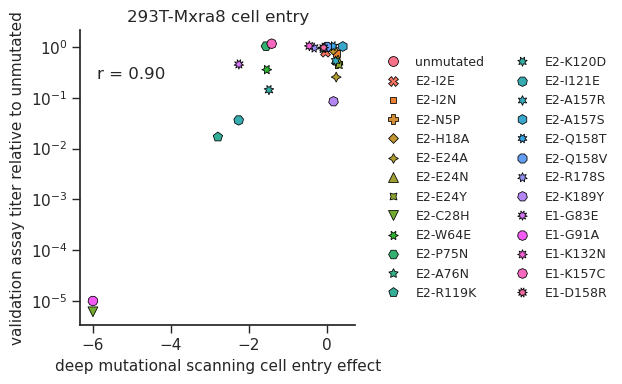

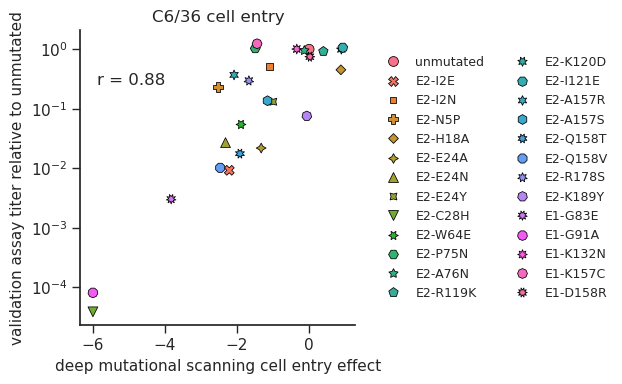

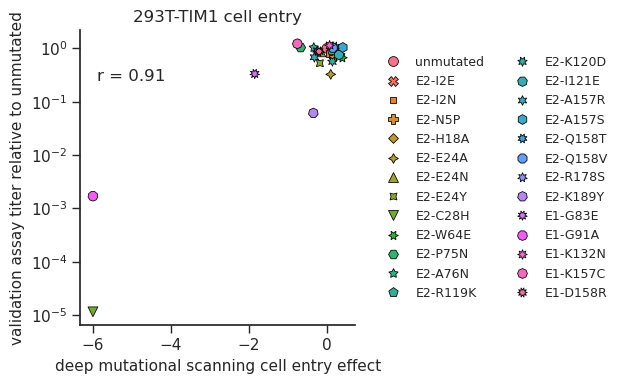

In [2]:
# Load data
df = pd.read_csv('experimental_data/cell_entry_validations.csv')

for dms_col, val_col, cell in [
    ('entry in 293T_Mxra8 cells', 'relative titer in 293T_Mxra8 cells', "293T-Mxra8"),
    ('entry in C636 cells', 'relative titer in C636 cells', "C6/36"),
    ('entry in 293T_TIM1 cells', 'relative titer in 293T_TIM1 cells', "293T-TIM1"),
]:
    df[dms_col] = df[dms_col].clip(lower=-6)
    # Calculate Pearson correlation using log-transformed titer
    r_value, _ = pearsonr(
        df[dms_col],
        np.log10(df[val_col])
    )
    
    # Set style without grid lines
    sns.set(style="white", context="notebook", font_scale=1)
    
    # Create square figure with enough space for the legend
    plt.figure(figsize=(6.5, 4))
    
    # Create scatter plot
    ax = sns.scatterplot(
        x=dms_col,
        y=val_col,
        hue='mutation',
        style='mutation',
        data=df,
        s=50,
        edgecolor='black'
    )
    
    # Set y-axis to log scale
    ax.set_yscale('log')
    
    # Turn off all grid lines
    ax.grid(False)
    
    # Show only left and bottom spines (clean axis style)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Configure major tick marks and labels
    ax.tick_params(
        axis='both',
        which='major',
        length=6,
        width=1,
        direction='out',
        bottom=True,
        left=True,
        labelbottom=True,
        labelleft=True,
        labelsize=11,
    )
    
    # Optionally disable minor ticks if they appear
    ax.tick_params(which='minor', length=0)
    
    # Annotate correlation coefficient
    x_pos = df[dms_col].min() + 0.1
    y_pos = df[val_col].max() / 5
    ax.text(x_pos, y_pos, f"r = {r_value:.2f}", fontsize=12)
    
    # Labels and title
    ax.set_xlabel("deep mutational scanning cell entry effect", fontsize=11)
    ax.set_ylabel("validation assay titer relative to unmutated", fontsize=11)
    ax.set_title(f"{cell} cell entry", fontsize=12)
    
    # Move legend outside the plot and adjust font size
    ax.legend(
        bbox_to_anchor=(1.05, 0.5),  # Adjusting legend position (centered on the right)
        loc='center left',  # Positioning legend on the left side of bbox_to_anchor
        borderaxespad=0.5,  # Space between the plot and the legend
        frameon=False,
        ncol=2,  # Adjust number of columns if needed
        prop={'size': 9}  # Set the font size here (adjust as needed)
    )
    
    # Adjust layout to fit everything
    plt.tight_layout()
    
    # Save as SVG to the figures folder
    plt.savefig(f"figures/cell_entry_validation_{cell.replace('/', '')}.svg", dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()